# **-----PROBLEMİN AÇIKLANMASI ve KÜTÜPHANELERİN YÜKLENMESİ-----**

Arabaların fiyatını çok çeşitli niteliklere ve özelliklere dayanarak tahmin etmek. Boyutlar, katedilen mesafe, motor özellikleri ve daha fazlası gibi araba ayrıntılarını içeren bir veri kümesi kullanarak, farklı araba modellerinin fiyatını doğru bir şekilde tahmin eden bir makine öğrenimi modeli geliştirmeyi amaçlıyoruz.

İhityaç Duyacağımız kütüphaneleri ekliyoruz

pandas => csv, txt, excel ve benzeri dosyaları okuyup yüklemek ve veri işleme işlemlerini gerçekleştirmek için kullanılır.

numpy => Çok boyutlu diziler üzerinde matematiksel işlemleri hızlı ve kolay bir şekilde yapmak için kullanılır.

matplotlib => Grafik oluşturmak veri görselleştirmek için kullanılır.

seaborn => Grafik oluşturmak veri görselleştirmek için kullanılır.

Bu kütüphaneleri kullanarak verimizi yükleyip görselleştirmesini gerçekleştireceğiz.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# **--------------------Veri Analizi ve Ön İşleme--------------------**

In [53]:
#Pandas kütüphanesini kullanarak CSV dosyasının içerisindeki verileri bir DataFrame'e (df) yükledik.
df = pd.read_csv('car_price_prediction_cleaned.csv')

In [54]:
# Satır ve sütun sayısını öğrenelim.
df.shape

(19237, 18)

In [55]:
# Sütunların veri türlerini kontrol edelim.
df.dtypes

,0
ID,int64
Price,int64
Levy,object
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,float64


In [56]:
# İlk 5 satırı görüntüleyelim.
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [57]:
# Boş değer var mı diye kontrol edelim.
df.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [58]:
 # Her sütunun benzersiz değerlerinin sayısını kontrol edelim.
df.nunique()

,0
ID,18924
Price,2315
Levy,559
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,65


In [59]:
# CSV dosyasını yükleme
file_path = "car_price_prediction_cleaned.csv"
data = pd.read_csv(file_path)

# 'Levy' sütununda '-' içeren satırları df ye atama işlemi
df = data[data['Levy'] != '-']

# Levy sütunu sayısal değerler içermesine rağmen object türünde gözüküyor bunu da düzeltelim
df['Levy'] = pd.to_numeric(df['Levy'])


print(df.head())  # İlk birkaç satırı görüntüle

         ID  Price  Levy Manufacturer     Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS    RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET   Equinox        2011       Jeep   
3  45769185   3607   862         FORD    Escape        2011       Jeep   
4  45809263  11726   446        HONDA       FIT        2014  Hatchback   
5  45802912  39493   891      HYUNDAI  Santa FE        2016       Jeep   

  Leather interior Fuel type  Engine volume   Mileage  Cylinders  \
0              Yes    Hybrid            3.5  186005.0        6.0   
1               No    Petrol            3.0  192000.0        6.0   
3              Yes    Hybrid            2.5  168966.0        4.0   
4              Yes    Petrol            1.3   91901.0        4.0   
5              Yes    Diesel            2.0  160931.0        4.0   

  Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
0     Automatic          4x4  04-May  Left wheel  Silver       12  
1     Tipt

<ipython-input-59-282d105998e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Levy'] = pd.to_numeric(df['Levy'])


In [60]:
# Satır ve sütun sayısını kaldırma işlemi sonrası tekrar kontrol edelim
df.shape

(13418, 18)

In [61]:
#Sütunlarımızın veri tiplerini tekrar kontrol edelim
df.dtypes

,0
ID,int64
Price,int64
Levy,int64
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,float64


In [62]:
# Veri kümesinin istatistiklerini kontrol edelim.
df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.341800e+04,13418.000000,13418.000000,13418.000000,13418.000000,1.341800e+04,13418.000000,13418.000000
mean,4.566782e+07,17298.492175,906.838128,2013.138024,2.317208,3.724392e+05,4.516619,6.894619
std,4.790493e+05,19370.756312,461.867051,3.050424,0.872821,2.044857e+07,1.122808,4.465039
min,3.175700e+07,1.000000,87.000000,1965.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.572708e+07,3607.000000,640.000000,2011.000000,1.800000,6.800000e+04,4.000000,4.000000
50%,4.577056e+07,13500.000000,781.000000,2013.000000,2.000000,1.183655e+05,4.000000,4.000000
75%,4.580321e+07,23436.000000,1058.000000,2015.000000,2.500000,1.792000e+05,4.000000,12.000000
max,4.581665e+07,872946.000000,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


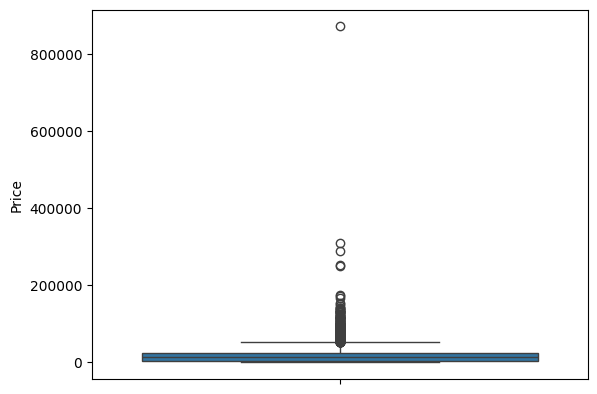

In [63]:
# Aykırı değer kontrolü yapalım. Price sütunu için

sns.boxplot(data=df['Price'])
plt.show()

#Halkalar aykırı değerleri temsil eder

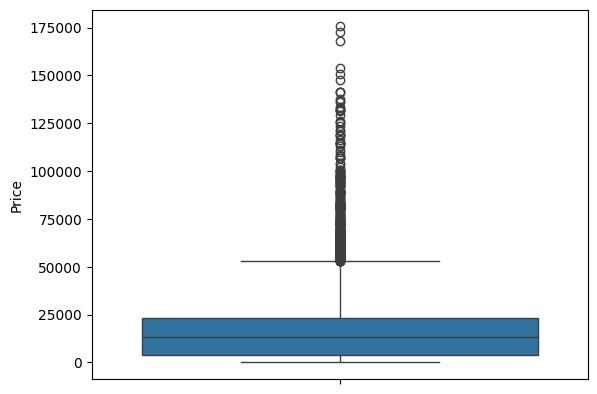

In [64]:
# Belirli bir aralıktaki değerleri tespit etme (200000 ile 1000000 arasında)
outlier_condition = (df["Price"] >= 200000) & (df["Price"] <= 1000000)


df = df[~outlier_condition]  # Aykırı olmayan değerleri seçip df ye atadık


sns.boxplot(data=df['Price'])
plt.show()

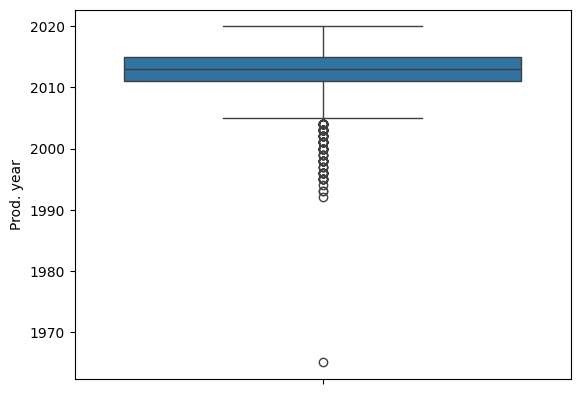

In [65]:
# Aykırı değer kontrolü Prod. year sütunu için
sns.boxplot(data=df['Prod. year'])
plt.show()

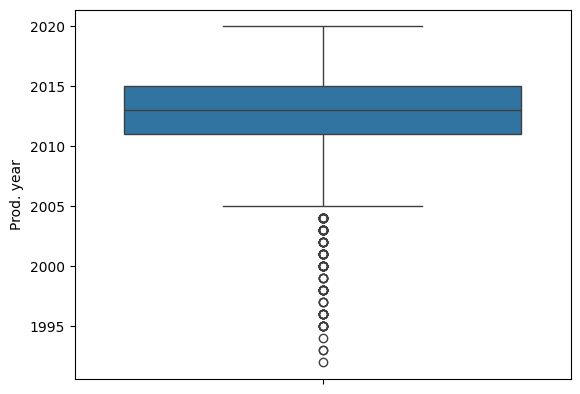

In [66]:
# Belirli bir aralıktaki değerleri tespit etme (1900 ile 1980 arasında)
outlier_condition2 = (df["Prod. year"] >= 1900) & (df["Prod. year"] <= 1980)

df = df[~outlier_condition2]  # Aykırı olmayan değerleri seçiyoruz


sns.boxplot(data=df['Prod. year'])
plt.show()

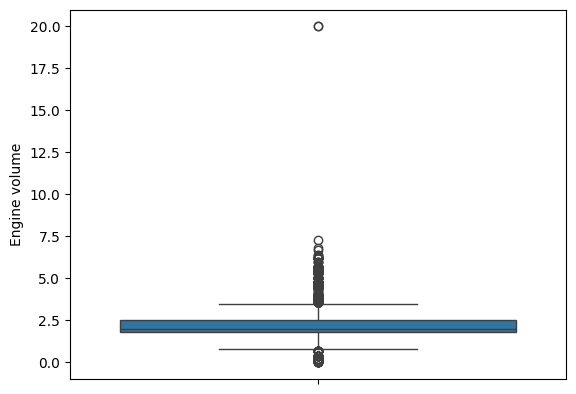

In [67]:
# Aykırı değer kontrolü Engine volume sütunu için
sns.boxplot(data=df['Engine volume'])
plt.show()

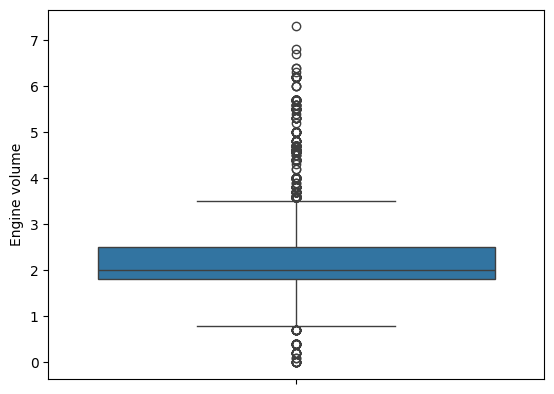

In [68]:
# Belirli bir aralıktaki değerleri tespit etme 11 ile 21 arasında)
outlier_condition3 = (df["Engine volume"] >= 11) & (df["Engine volume"] <= 21)

df = df[~outlier_condition3]  # Aykırı olmayan değerleri seçiyoruz


sns.boxplot(data=df['Engine volume'])
plt.show()

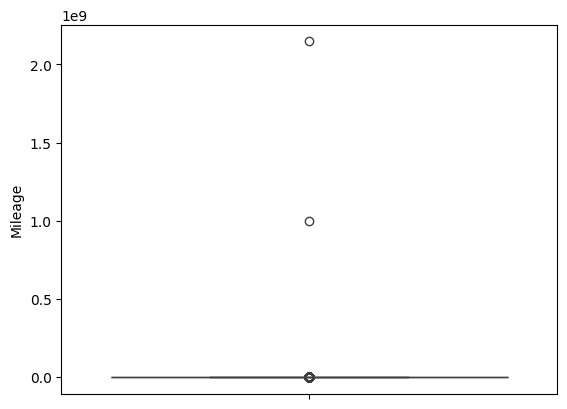

In [69]:
# Aykırı değer kontrolü Mileage sütunu için
sns.boxplot(data=df['Mileage'])
plt.show()


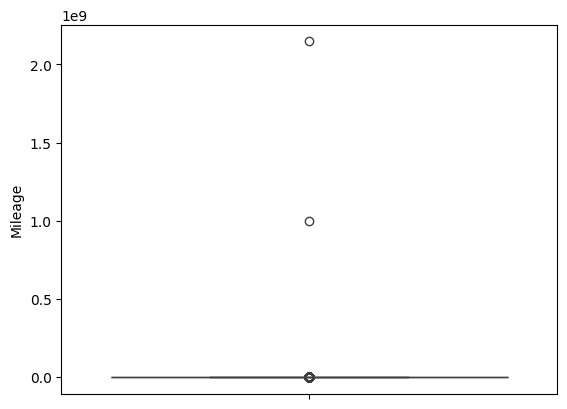

In [70]:
# Belirli bir aralıktaki değerleri tespit etme (0 ile 10 arasında)
outlier_condition4 = (df["Mileage"] >= 1000000.0) & (df["Mileage"] <= 5000000.0)

# Bu aralıktaki değerleri silme
df = df[~outlier_condition4]  # Aykırı olmayan değerleri seçiyoruz


sns.boxplot(data = df['Mileage'])
plt.show()

In [71]:
# Kategorik ve sayısal değişkenlerin ayrılması
#Ekrana da yazdıralım
kategorik_sutunlar = df.select_dtypes(include=['object']).columns
sayisal_ozellikler = df.select_dtypes(include=['int64', 'float64']).columns

print("Kategorik değişkenler:", kategorik_sutunlar)
print("Sayısal değişkenler:", sayisal_ozellikler)

Kategorik değişkenler: Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')
Sayısal değişkenler: Index(['ID', 'Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage',
       'Cylinders', 'Airbags'],
      dtype='object')


In [72]:
# Belirli kategorik sütunlarda bulunan benzersiz kategorik değerleri görüntüleyelim.
kategorik_sutunlar = df.select_dtypes(include=['object']).columns

#Veri tipi object olan sütunları seçtik ve bu sütunların isimlerini döndürdük. Bu sütunlar kategorik_sutunlar değişkenine atanır.

for sutun in kategorik_sutunlar:
  print(f"{sutun} sütünundaki kategoriler : {df[sutun].unique()}")   #Her sütundaki benzersiz kategorileri ekrana yazdırır.
  print("-"*100)    #Bu satır, her sütun arasına 100 karakter uzunluğunda bir ayırıcı çizgi ekler.


Manufacturer sütünundaki kategoriler : ['LEXUS' 'CHEVROLET' 'FORD' 'HONDA' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'PORSCHE' 'VOLKSWAGEN' 'AUDI' 'NISSAN' 'BMW' 'SUBARU' 'DAEWOO'
 'SSANGYONG' 'MAZDA' 'GMC' 'KIA' 'INFINITI' 'FIAT' 'OPEL' 'MITSUBISHI'
 'ACURA' 'CITROEN' 'RENAULT' 'JEEP' 'DODGE' 'MINI' 'CHRYSLER' 'JAGUAR'
 'DAIHATSU' 'BUICK' 'LAND ROVER' 'TESLA' 'CADILLAC' 'SUZUKI' 'LINCOLN'
 'BENTLEY' 'MERCURY' 'VOLVO' 'VAZ' 'MASERATI' 'FERRARI' 'SKODA' 'PEUGEOT'
 'GAZ' 'SCION' 'HUMMER']
----------------------------------------------------------------------------------------------------
Model sütünundaki kategoriler : ['RX 450' 'Equinox' 'Escape' 'FIT' 'Santa FE' 'Prius' 'Sonata' 'Camry'
 'E 350' 'CHR' 'Elantra' 'RX 400' 'GX 470' 'Highlander' 'Vito' 'Cayenne'
 'CHR Limited' 'H1' 'Jetta' 'Tacoma' 'Prius C' 'Civic' 'Q7' 'E 300' 'Q5'
 'Juke' '535' 'Cruze LT' 'Fusion' 'Tucson' 'Captiva' 'ML 350' 'Yaris'
 'Cruze' 'Orlando' 'GL 63 AMG' 'Forester' 'Lacetti' 'Genesis' '911'
 'GX 460' 'Focus SE' 'X5' 

# **--------------------Veri Görselleştirme--------------------**

Veri setinde yer alan sayısal özelliklerin her biri için dağılım grafiklerini (histogram ve KDE) çizerek:

*   Özelliklerin değer aralığını,
*   Verilerin yoğunlaştığı bölgeleri,
*   Dağılımın simetrik olup olmadığını veya uç değerlerin (outliers) varlığını inceleyelim.

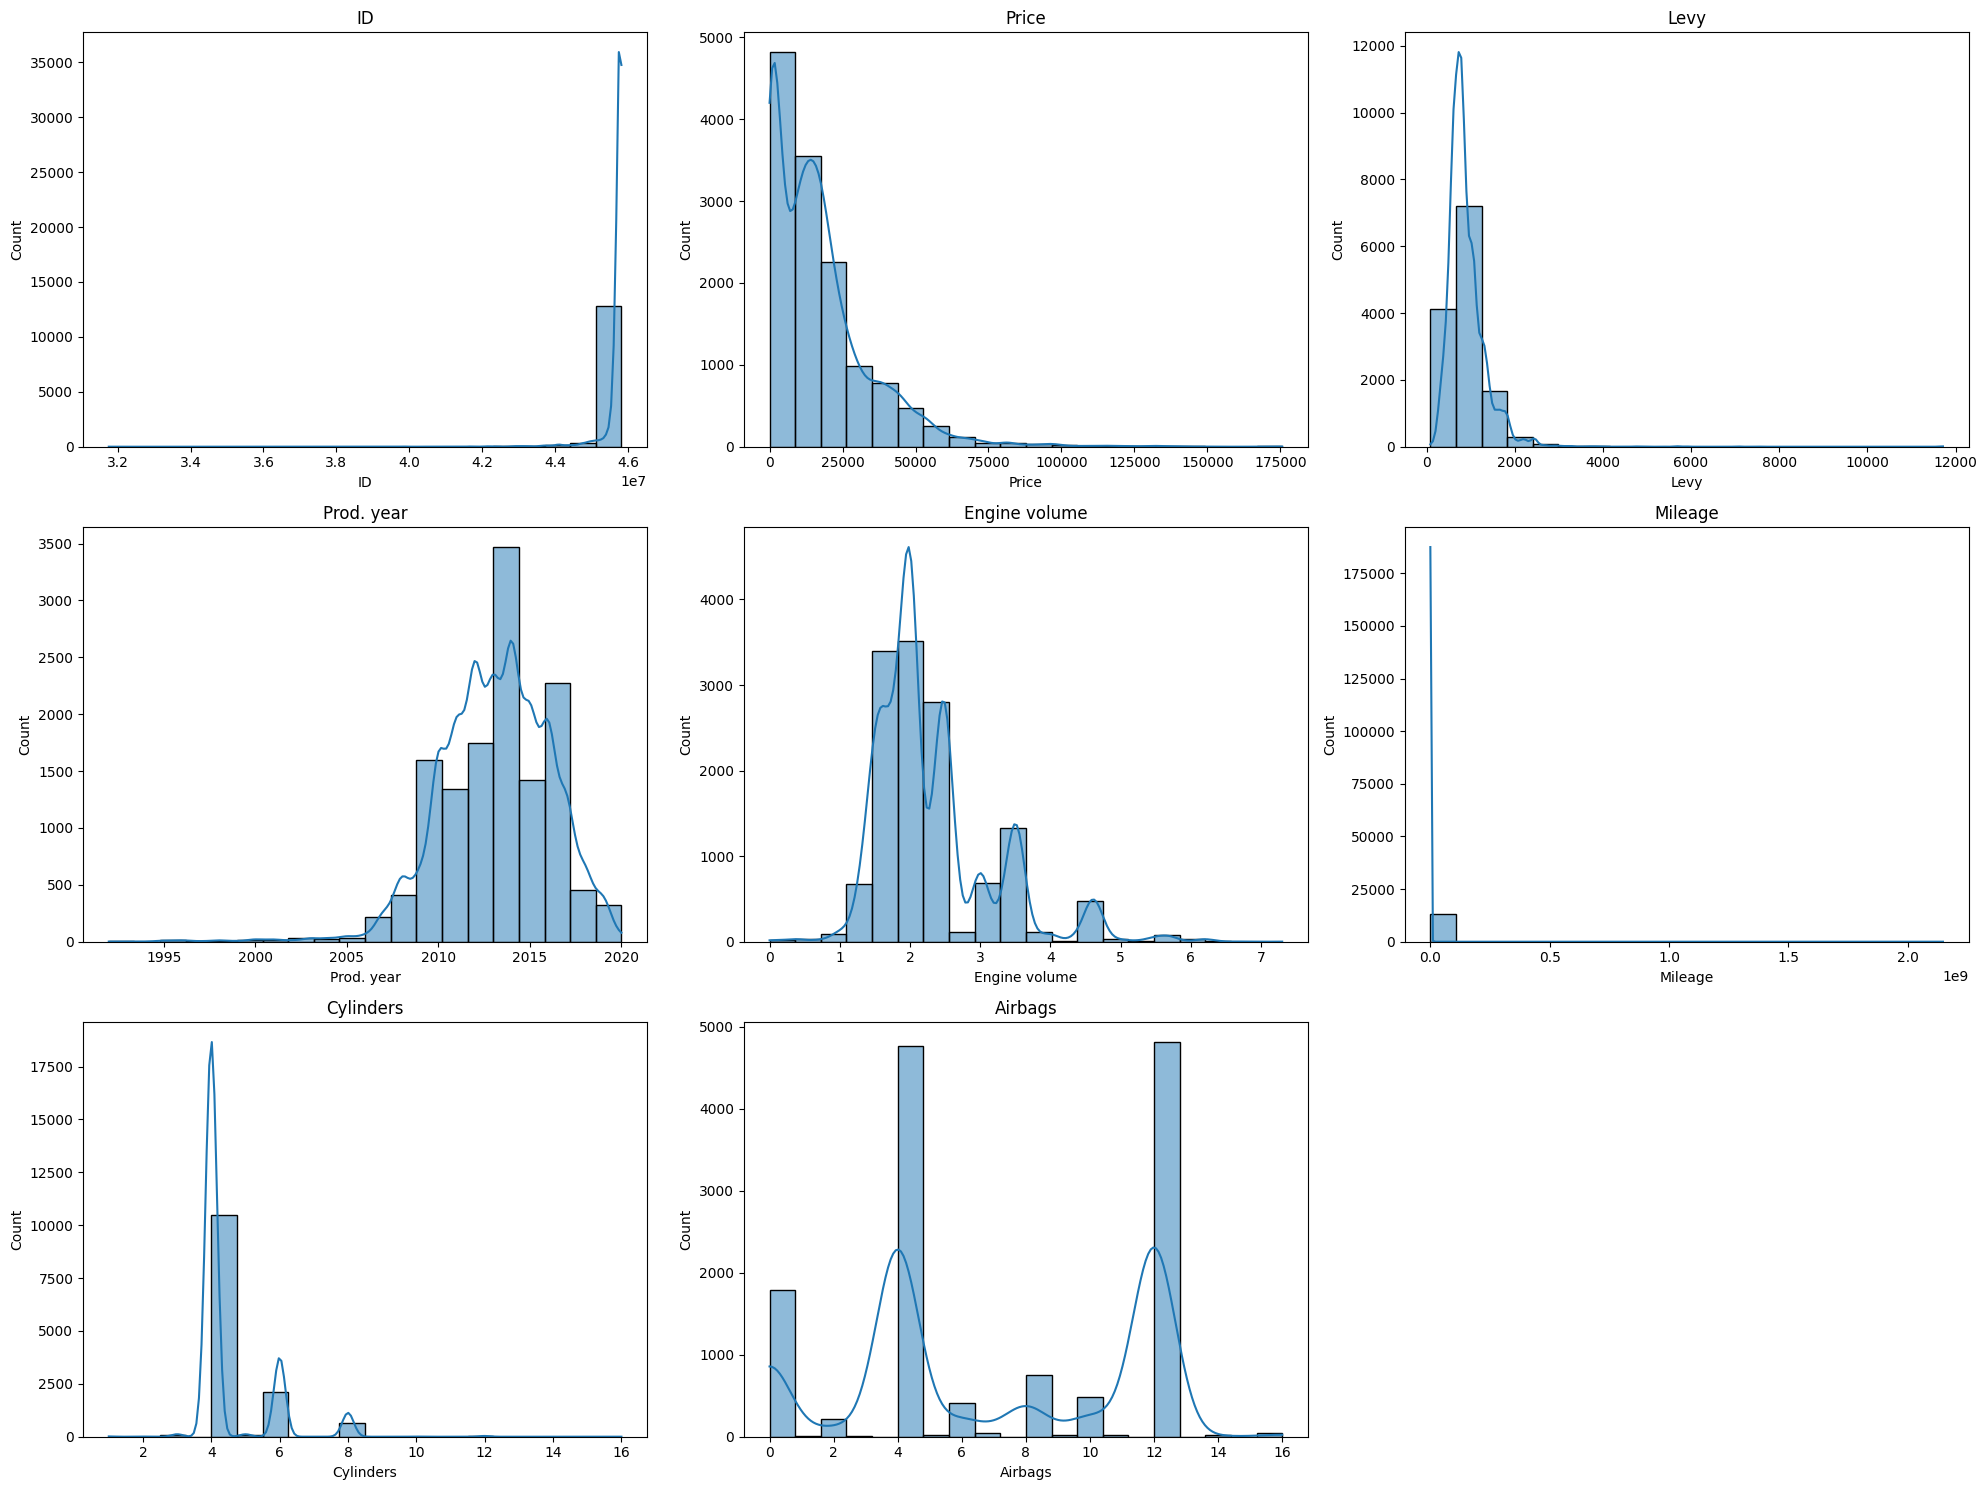

In [73]:
plt.figure(figsize=(20, 15))   #Bu satır, grafiklerin boyutunu ayarlar. figsize parametresi, grafiğin genişlik ve yüksekliğini inç cinsinden belirtir.
for i, ozellik in enumerate(sayisal_ozellikler):  # listdeki her sayısal sütun için tekrarlanır. enumerate() fonksiyonu, her sütun için bir indeks ve sütun adı döndürür.
    plt.subplot(3, 3, i + 1)   #Bu satır, 3x3'lik bir ızgara düzeninde alt grafikler oluşturur
    sns.histplot(data=df[ozellik], bins=20, kde=True)  #Her sayısal sütunu için histogram oluşturur. bins=20, histogramın 20 kutuya bölünmesini sağlar. kde=True, yoğunluk tahmin eğrisini ekler.
    plt.title(ozellik)    #Bu satır, her alt grafiğe sütun adını başlık olarak ekler
plt.tight_layout()    #Bu satır, grafiklerin düzenini sıkıştırarak daha iyi görünmelerini sağlar.
plt.show()    #oluşturulan grafikleri ekranda gösterelim

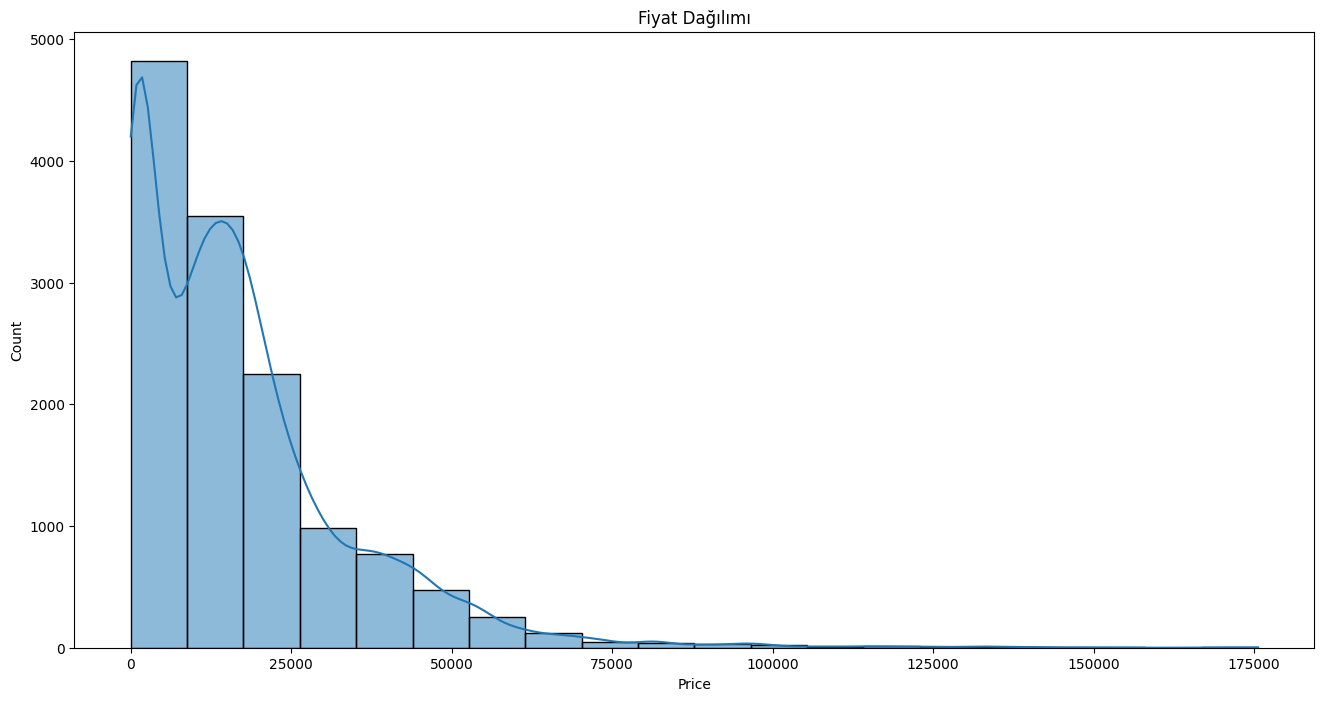

In [74]:
# Price analizi
plt.figure(figsize=(16, 8)) #Bu satır, grafiklerin boyutunu ayarlar.(genişlik ve yükseklik)
sns.histplot(data=df['Price'], bins=20, kde=True)  #Bu satır price sütunundaki verilerin histogramını oluşturur
plt.title('Fiyat Dağılımı')
plt.show()

<ipython-input-75-bbc776e90efd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[sutun], data=df, palette='bright', ax=axes[i], saturation=0.95) #her kategorik sütunu için bir sayım grafiği oluşturur.(bright parlak renkler , doygunluk)
<ipython-input-75-bbc776e90efd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[sutun], data=df, palette='bright', ax=axes[i], saturation=0.95) #her kategorik sütunu için bir sayım grafiği oluşturur.(bright parlak renkler , doygunluk)
<ipython-input-75-bbc776e90efd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same eff

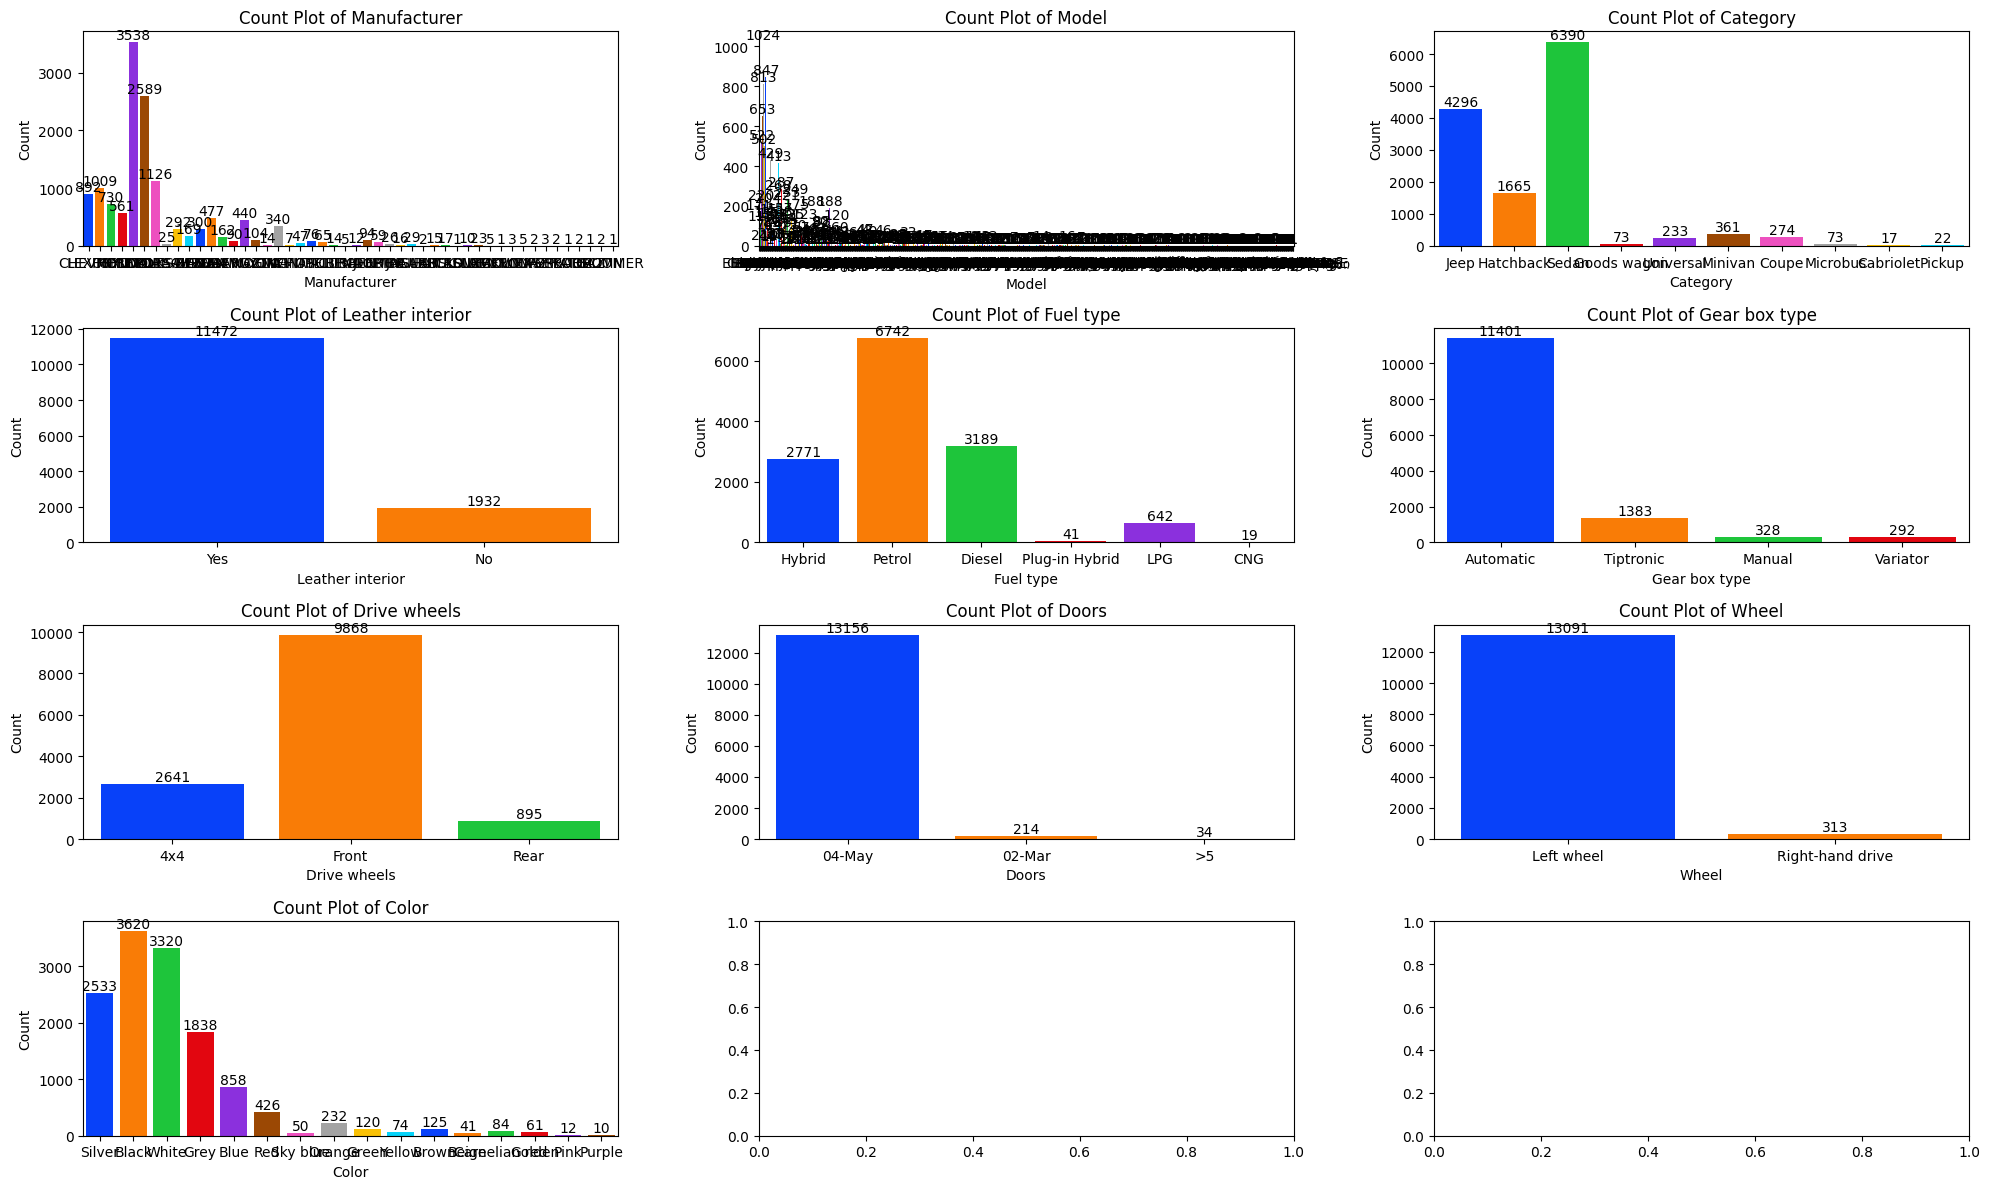

In [75]:
# Alt grafikler oluşturalım.
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 12))   #Bu satır 4 satır ve 3 sütundan oluşan alt grafikler oluşturur
axes = axes.ravel()  # 2D eksen dizisini düzleştirir (1D hale getirir)

# Her kategorik sütun için döngü
for i, sutun in enumerate(kategorik_sutunlar): #Her kategorik sütun için döngü
    sns.countplot(x=df[sutun], data=df, palette='bright', ax=axes[i], saturation=0.95) #her kategorik sütunu için bir sayım grafiği oluşturur.(bright parlak renkler , doygunluk)
    for container in axes[i].containers:  #Her grafikteki çubukları etiketlemek için bir döngü daha oluşturduk.
        axes[i].bar_label(container, color='black', size=10)  #Her çubuğun üzerine etiket ekledik.
    axes[i].set_title(f'Count Plot of {sutun.capitalize()}')  #Bu satır, her alt grafiğe sütun adını başlık olarak ekler.
    axes[i].set_xlabel(sutun.capitalize())  #Bu satır, x eksenine sütun adını eklememizi sağlar.
    axes[i].set_ylabel('Count')  #Bu satır, y eksenine "Count" etiketini ekler.

# Düzenle ve göster
plt.tight_layout()  #Bu satır, grafiklerin düzenini sıkıştırarak daha iyi görünmelerini sağlar.
plt.show()

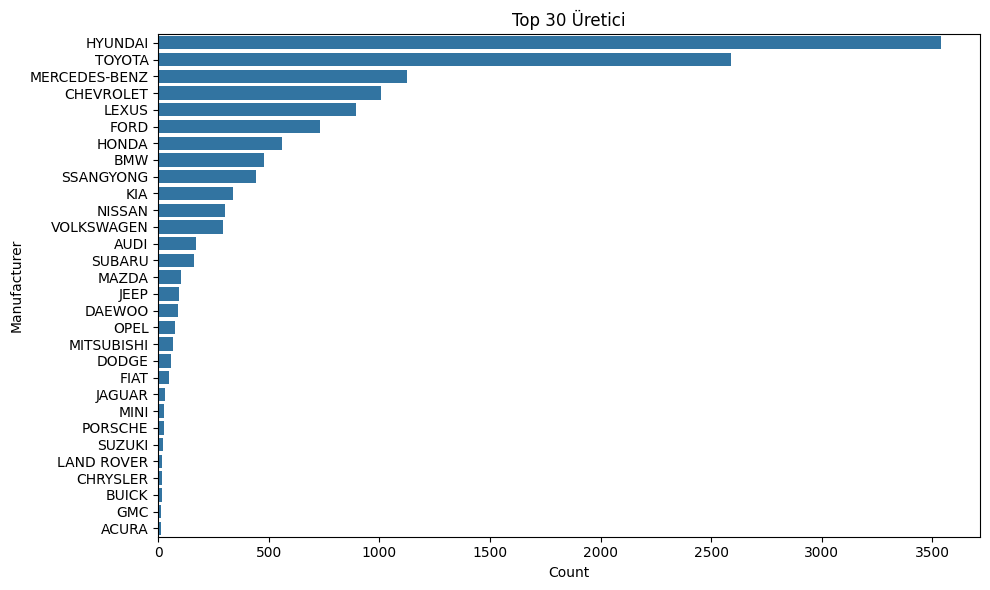

In [76]:
# Verisetinde en çok hangi üreticiden varsa görelim.
n = 30    #Bu değişken, en çok araç üreten 30 üreticiyi seçmek için kullanılır.
top_car_manufacturer = df['Manufacturer'].value_counts().head(n)
#Bu satır, Manufacturer sütunundaki değerlerin sayısını hesaplar ve en çok araç üreten ilk 30 üreticiyi seçer.
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_manufacturer.values, y=top_car_manufacturer.index)  #X ekseni üretici sayısını, y ekseni ise üretici adlarını gösterir.
plt.title(f'Top {n} Üretici')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.tight_layout()  #Bu satır, grafiklerin düzenini sıkıştırarak daha iyi görünmelerini sağlar.
plt.show()

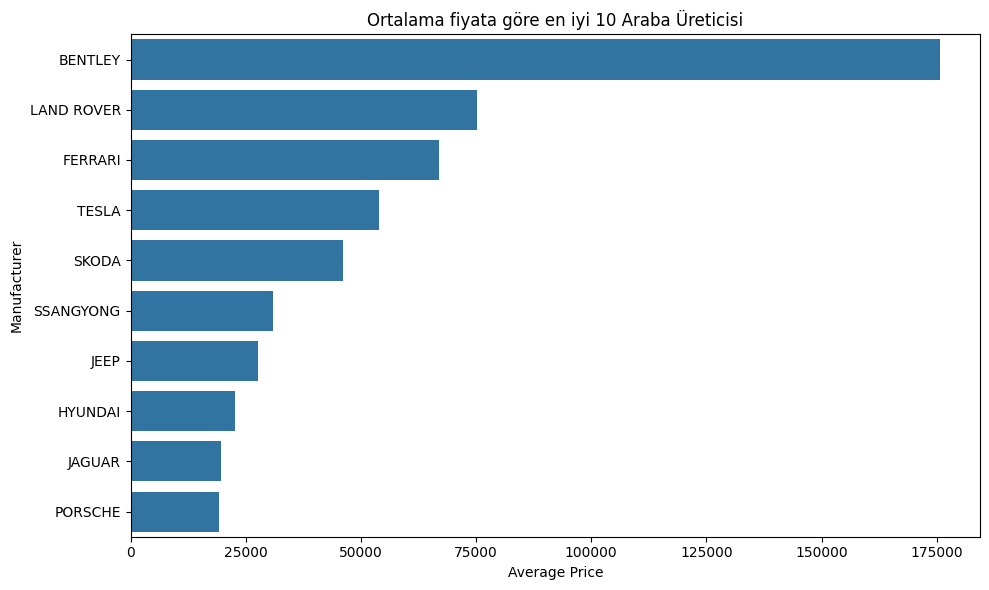

In [77]:
#Manufacturer sütununa göre gruplandırma yapalım, her grup için Price sütununun ortalamasını hesaplayalım ve bu ortalamaları azalan sıraya göre sıralayalım
avg_prices_by_car = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

# Ortalama fiyata göre en iyi N araba modelini çizelim.
n = 10
top_car_manufacturer = avg_prices_by_car.head(n)  #Bu satır, en yüksek ortalama fiyata sahip ilk 10 üreticiyi seçer.

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_manufacturer.values, y=top_car_manufacturer.index)
plt.title(f'Ortalama fiyata göre en iyi {n} Araba Üreticisi')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

In [78]:
# Kategorik sütunları encode etme ve eski-yeni değerleri kaydetme

encoded_mappings = {}   #Eski ve yeni değerleri saklamak için boş bir sözlük oluşturduk

label_encoder = LabelEncoder()   #Label Encoder'ı başlattık
for column in kategorik_sutunlar:  #Her sütun da tekrarlanması için for döngüsü başlattık
    df[column] = label_encoder.fit_transform(df[column]) #Label Encoder ile sayısal değerlere dönüştürdük ve orijinal sütunun üzerine yazdık.


    # Bir data frame oluşturalım ve eski ve yeni değerleri saklayalım
    encoded_mappings[column] = pd.DataFrame({
        'Orijinal': label_encoder.classes_,
        'Encoded': range(len(label_encoder.classes_))
    })

# Encoded edilmiş DataFrame'i yazdıralım
print("Encoded DataFrame:")
print(df.head())

# Eski ve yeni değerlerin gösterimi
print("\nEski ve Yeni Değerler:")
for column, mapping_df in encoded_mappings.items(): #Her sütun için eski ve yeni değerleri yazdırmak için for döngüsü başlattık
    print(f"\nSütun: {column}")   #Sütun isimlerini ekrana yazdıralım
    print(mapping_df)  #Eski ve yeni değerleri içeren Data Frame'i ekrana yazdıralım



Encoded DataFrame:
         ID  Price  Levy  Manufacturer  Model  Prod. year  Category  \
0  45654403  13328  1399            25    626        2010         4   
1  44731507  16621  1018             6    312        2011         4   
3  45769185   3607   862            14    315        2011         4   
4  45809263  11726   446            17    330        2014         3   
5  45802912  39493   891            19    649        2016         4   

   Leather interior  Fuel type  Engine volume   Mileage  Cylinders  \
0                 1          2            3.5  186005.0        6.0   
1                 0          4            3.0  192000.0        6.0   
3                 1          2            2.5  168966.0        4.0   
4                 1          4            1.3   91901.0        4.0   
5                 1          1            2.0  160931.0        4.0   

   Gear box type  Drive wheels  Doors  Wheel  Color  Airbags  
0              0             0      1      0     12       12  
1      

In [79]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,25,626,2010,4,1,2,3.5,186005.0,6.0,0,0,1,0,12,12
1,44731507,16621,1018,6,312,2011,4,0,4,3.0,192000.0,6.0,2,0,1,0,1,8
3,45769185,3607,862,14,315,2011,4,1,2,2.5,168966.0,4.0,0,0,1,0,14,0
4,45809263,11726,446,17,330,2014,3,1,4,1.3,91901.0,4.0,0,1,1,0,12,4
5,45802912,39493,891,19,649,2016,4,1,1,2.0,160931.0,4.0,0,1,1,0,14,4


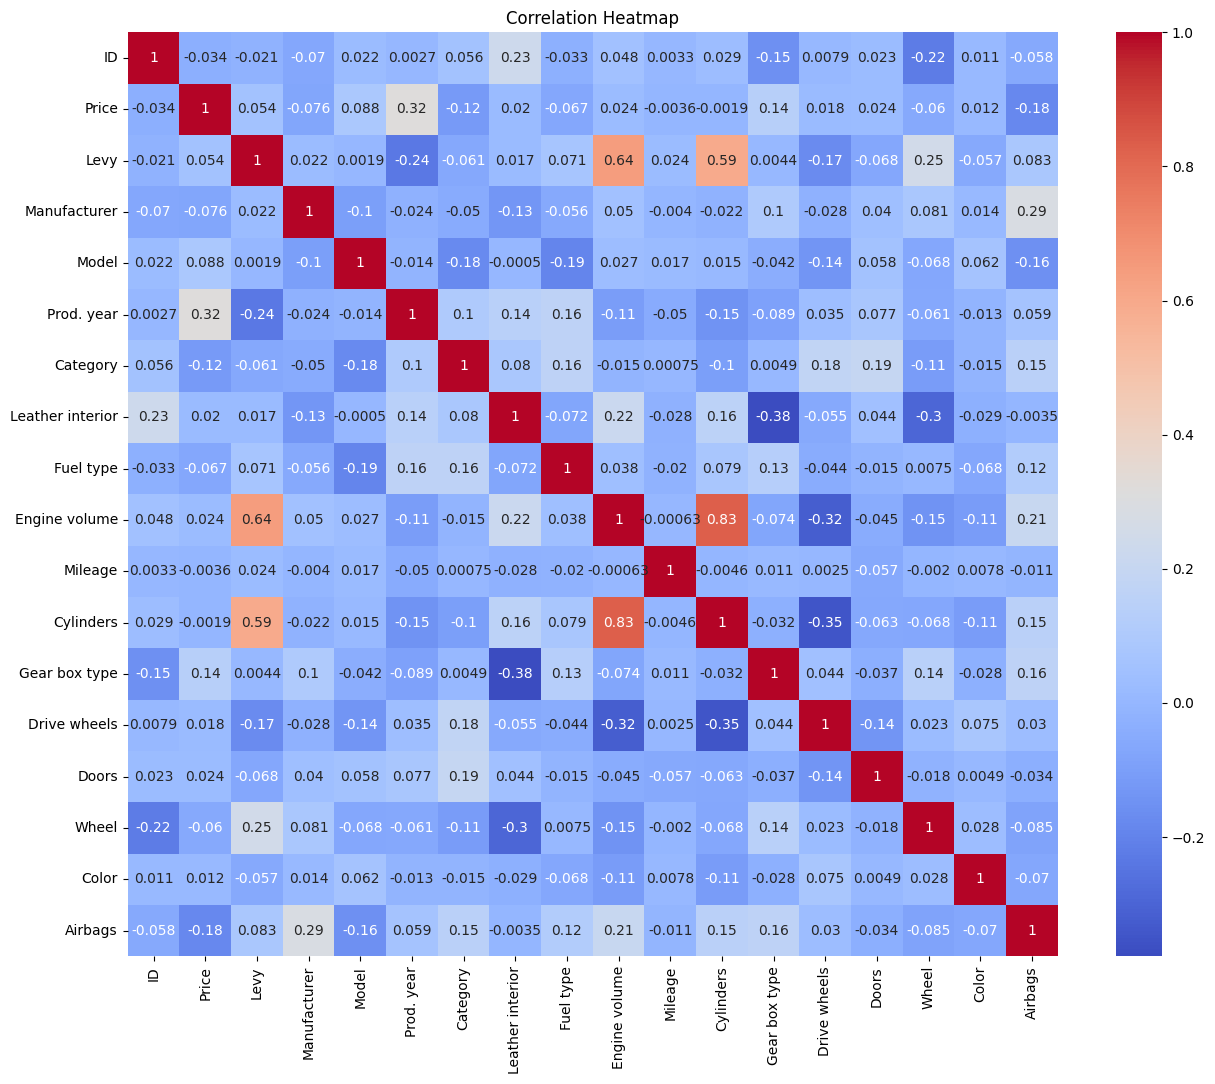

In [80]:
# corr-Isı haritası

#Veri tipi float64 veya int64 olan (sayısal) sütunları seçelim ve yeni bir DataFrame oluşturalım.
sayisal_ozelikler_for_corr=df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 12))  #Grafik genişlik ve yüksekliğini ayarladık

#DataFrame'in korelasyon matrisini hesaplayalım ve bir ısı haritası olarak görselleştirelim.
sns.heatmap(sayisal_ozelikler_for_corr.corr(), annot=True, cmap='coolwarm')  #(annot=True korelasyon değeri. cmap='coolwarm', renk paleti)
plt.title('Correlation Heatmap')
plt.show()


In [81]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,25,626,2010,4,1,2,3.5,186005.0,6.0,0,0,1,0,12,12
1,44731507,16621,1018,6,312,2011,4,0,4,3.0,192000.0,6.0,2,0,1,0,1,8
3,45769185,3607,862,14,315,2011,4,1,2,2.5,168966.0,4.0,0,0,1,0,14,0
4,45809263,11726,446,17,330,2014,3,1,4,1.3,91901.0,4.0,0,1,1,0,12,4
5,45802912,39493,891,19,649,2016,4,1,1,2.0,160931.0,4.0,0,1,1,0,14,4
6,45656768,1803,761,44,571,2010,3,1,2,1.8,258909.0,4.0,0,1,1,0,14,12
7,45816158,549,751,19,666,2013,8,1,4,2.4,216118.0,4.0,0,1,1,0,7,12
8,45641395,1098,394,44,179,2014,8,1,2,2.5,398069.0,4.0,0,1,1,0,1,12
10,45621750,941,1053,29,272,2014,8,1,1,3.5,184467.0,6.0,0,2,1,0,14,12
13,45661288,1019,1055,25,626,2013,4,1,2,3.5,138038.0,6.0,0,1,1,0,14,12


# **---------------------Model Seçimi ve Eğitim---------------------**

In [82]:
# Eğitim ve test verisinin ayrılması
X = df.drop('Price', axis=1) #Price sütununu çıkartıp kalanları x e atadık
y = df['Price']  #Price sütununu y ye atadık

#X ve y verilerini eğitim ve test setlerine bölelim. Verinin 0.2'sini test seti olarak ayıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nEğitim verisi boyutları:", X_train.shape, y_train.shape)  #Eğitim verisinin boyutları
print("Test verisi boyutları:", X_test.shape, y_test.shape)  #Test verisinin boyutları


Eğitim verisi boyutları: (10723, 17) (10723,)
Test verisi boyutları: (2681, 17) (2681,)


In [83]:
# Gerekli kütüphaneleri import edelim
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Kullanacağımız modelleri seçelim
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
    #Random-state parametresi, modelin içindeki rastgele işlemlerin aynı şekilde gerçekleştirilmesini sağlar
}
results = {}   #Model performanslarını saklamak için bir sözlük oluşturduk

# '-' gibi karakterleri NaN olarak işaretleyelim
X_train.replace('-', np.nan, inplace=True)

for name, model in models.items():  #Her bir modeli alabilmek için döngü başlattık
    model.fit(X_train, y_train)
    # Model değişkeni, X_train ve y_train verilerini kullanarak eğitilir. fit fonksiyonu, modelin eğitim verileri üzerinde öğrenmesini sağlar.

    y_pred = model.predict(X_test)
    # Model, X_test verileri üzerinde tahminler yapar ve sonuçları y_pred değişkenine atar. predict fonksiyonu, modelin test verileri üzerindeki tahminlerini döndürür.

    mse = mean_squared_error(y_test, y_pred)
    #mean_squared_error fonksiyonu, modelin tahminleri (y_pred) ile gerçek değerler (y_test) arasındaki ortalama kare hatasını (MSE) hesaplar ve mse değişkenine atar.

    r2 = r2_score(y_test, y_pred)
    #r2_score fonksiyonu, modelin tahminleri ile gerçek değerler arasındaki R2 skorunu hesaplar ve r2 değişkenine atar.

    results[name] = {'MSE': mse, 'R2': r2}
    #modelin adını anahtar olarak ekledik ve modelin performans metriklerini (MSE ve R2) değer olarak atadık.

    print(f"\n{name} Modeli:")   #Model adını ekrana yazdırdık
    print(f"Mean Squared Error: {mse}")  #Modelin mse sini ekrana yazdırdık
    print(f"R2 Score: {r2}")  #Modelin R2 skorunu ekrana yazdırdık


Linear Regression Modeli:
Mean Squared Error: 216020026.36607474
R2 Score: 0.2880581315611276

Random Forest Modeli:
Mean Squared Error: 45766951.50992205
R2 Score: 0.8491648690223367

XGBoost Modeli:
Mean Squared Error: 52078776.0
R2 Score: 0.8283628225326538


In [84]:
# Modellerin MSE ve R2 değerlerine bakalım
print("\nModel Performansları:")
for model_name, metrics in results.items(): #Result da ki her model için döner. Model adı ve performans metrikleri gösterilir
    print(f"{model_name}: MSE={metrics['MSE']}, R2={metrics['R2']}")  #Değerleri yazdırp karşılaştıralım


Model Performansları:
Linear Regression: MSE=216020026.36607474, R2=0.2880581315611276
Random Forest: MSE=45766951.50992205, R2=0.8491648690223367
XGBoost: MSE=52078776.0, R2=0.8283628225326538


In [85]:
#RandomForestRegressor modelini oluşturalım ve eğitelim.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train) #X_train ve y_train verilerini kullanarak modeli eğittik.

RandomForestRegressor(random_state=42)

In [86]:
#RandomForestRegressor modelini kullanarak X_test verileri üzerinde tahminler yaptıralım ve bu tahminleri bir değişkene atayalım
predict = model.predict(X_test)
predict   #Tahminleri incelemek için yazdıralım

array([15441.73,  8781.21, 20262.78, ...,  3905.96,  2832.69,  4155.85])

In [87]:
X_train.head(1)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
13886,45797269,583,19,424,2011,3,1,4,1.6,188244.0,4.0,0,1,1,0,14,4


In [88]:
#input_data_model adlı yeni bir DataFrame oluşturalım ve belirli bir veri kümesini bu DataFrame'e ekleyelim
input_data_model = pd.DataFrame(
    [[45437432, 1053, 44, 415, 2020, 4, 1, 4, 3.5, 95000.0, 6.0, 0, 0, 1,	0, 3,	12]],
    columns=['ID', 'Levy',	'Manufacturer',	'Model',	'Prod. year',	'Category',	'Leather interior', 'Fuel type',	'Engine volume',
             'Mileage',	'Cylinders',	'Gear box type',	'Drive wheels',	'Doors',	'Wheel',	'Color',	'Airbags'])

print(input_data_model)

         ID  Levy  Manufacturer  Model  Prod. year  Category  \
0  45437432  1053            44    415        2020         4   

   Leather interior  Fuel type  Engine volume  Mileage  Cylinders  \
0                 1          4            3.5  95000.0        6.0   

   Gear box type  Drive wheels  Doors  Wheel  Color  Airbags  
0              0             0      1      0      3       12  


In [89]:
#Bu satır, model değişkenindeki eğitilmiş RandomForestRegressor modelini kullanarak input_data_model verileri üzerinde tahminler yapar ve sonuçları y_head değişkenine atar.
y_head = model.predict(input_data_model)
print(y_head)

[21501.17]


In [90]:
## Modeli kaydedelim
import pickle as pk

with open('model.pkl', 'wb') as f:
    pk.dump(model, f)
#Model.pkl adlı bir dosyayı yazma modunda (wb) açtık ve dosya nesnesini f değişkenine atdık.
#Bu satır, model nesnesini serileştirir ve f dosya nesnesine kaydeder. (serileştirme = bayt dizisine dönüştürme)

In [91]:
print(type(model)) #model nesnesinin tipine bakalım

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [92]:
# Her sütunun benzersiz değerlerini yazdırma
for column in df.columns:
    unique_values = df[column].unique() #Bu satır, column sütunundaki benzersiz değerleri belirler ve unique_values değişkenine atar.
    print(f"Sütun: {column}")
    print(f"Benzersiz Değerler ({len(unique_values)}): {unique_values}")  #Sütundaki benzersiz değerlerin sayısını ve bu değerleri ekrana yazdırdık.
    print("-" * 50)  #Her sütun arasına - ekler

Sütun: ID
Benzersiz Değerler (13202): [45654403 44731507 45769185 ... 45804997 45793526 45813273]
--------------------------------------------------
Sütun: Price
Benzersiz Değerler (2069): [13328 16621  3607 ... 56814 63886 22075]
--------------------------------------------------
Sütun: Levy
Benzersiz Değerler (554): [ 1399  1018   862   446   891   761   751   394  1053  1055  1079   810
  2386  1850   531   586  1249  2455   583  1537  1288   915  1750   707
  1077  1486  1091   650   382  1436  1194   503  1017  1104   639   629
   919   781   530   640   765   777   779   934   769   645  1185  1324
   830  1187  1111   760   642  1604  1095   966   473  1138  1811   988
   917  1156   687 11714   836  1347  2866  1646   259   609   697   585
   475   690   308  1823  1361  1273   924   584  2078   831  1172   893
  1872  1885  1266   447  2148  1730   730   289   502   333  1325   247
   879  1342  1327  1598  1514  1058   738  1935   481  1522  1282   456
   880   900   798  127